In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pprint import pprint

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# Declaring a Base using 'automap_base()'
Base = automap_base()

# reflect the tables
# Using the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
# Print all the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the measurement class to a variable called 'Measurement':
Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [9]:
# Assign the station class to a variable called 'Station':
Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Creating the inspector and connecting it to the engine:
inspector = inspect(engine)

# Collecting the names of the tables within the database:
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Using the inspector to print the column names within the 'Measurement' table and its types:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Using the inspector to print the column names within the 'Station' table and its types:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Retrieving the earliest date:
earliest_query = session.query(Measurement.date)\
            .order_by(Measurement.date)\
            .first()
print(f"Earliest date is: {earliest_query[0]}")

Earliest date is: 2010-01-01


In [15]:
# Retrieving the latest date to design query for climate analysis 
latest_date = session.query(Measurement.date)\
            .order_by(Measurement.date.desc())\
            .first()
end_date = dt.datetime(2017,8,23)
print(f"Latest date is: {end_date}")

Latest date is: 2017-08-23 00:00:00


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
target_date = dt.date(2017, 8, 23)
delta = dt.timedelta(days=365)
query_date = target_date - delta
print(f"Query date is: {query_date}")

Query date is: 2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)\
        .filter(Measurement.date >= query_date)\
        .filter(Measurement.date <= end_date)\
        .all()
results[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [18]:
# Unpacking the precipitation data from the results and saving into seperate lists:
date = [r[0] for r in results]
prcp = [r[1] for r in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
# Creating the new dataframe for plotting:
prec_date_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
prec_date_df.set_index('Date', inplace=True)
prec_date_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [19]:
prec_date_df = prec_date_df.sort_index()

# Sort the dateframe by date
prec_date_df = prec_date_df.sort_values(by='Date')
prec_date_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [20]:
# # Using Pandas Plotting with Matplotlib to plot the data
# # prec_date_df.plot(kind="line", rot=45, figsize=(8,6), legend=False, fontsize=10, color="steelblue")
# prec_date_df.plot(figsize=(8,6), rot=45)
# # Adding the x,y labels & title:
# plt.ylabel("Precipitation inches", fontsize=14)
# plt.xlabel("Date", fontsize=14)
# plt.legend(["Precipitation"],loc="best")
# plt.title("Amount of Precipitation over 12 Month")
# plt.savefig("Images/precipitation_data1.png")

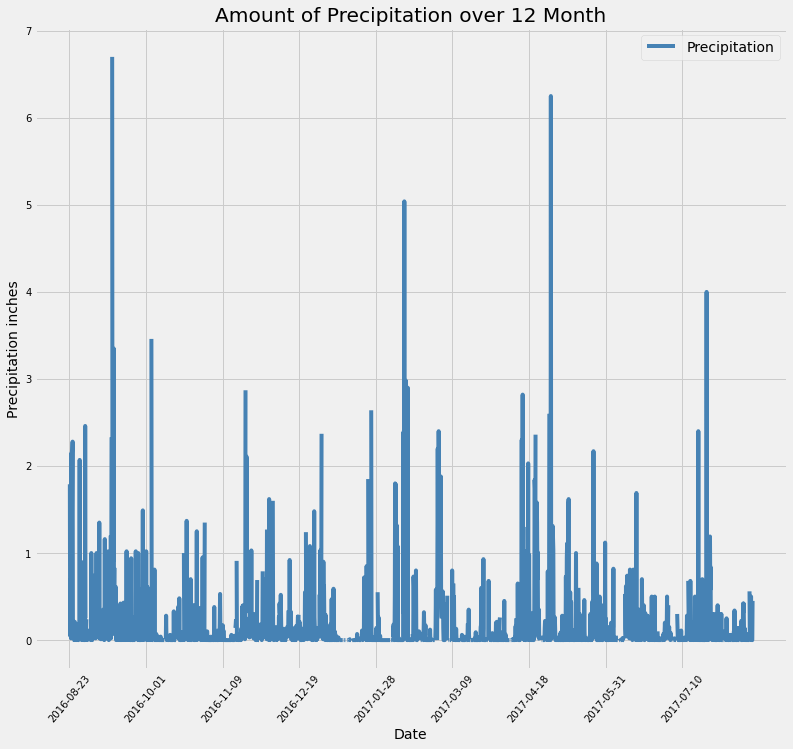

In [21]:
# Using Pandas Plotting with Matplotlib to plot the data
prec_date_df.plot(use_index=False, rot=50, figsize=(12,11), fontsize=10, color="steelblue")
#  Create list of all dates
data_date = prec_date_df.index
# # Create list of indexes of all dates
list_date_index = [*range(len(data_date))]
# # Indicate the xtick positions > plt.xticks( np.arange( min(x-axis), max(x-axis)+1, frequency) )
positions = np.arange(min(list_date_index), max(list_date_index)+1, 250)
# # Create empty list of dates to plot
labels = []
# # For loop to add dates to labels list
for i in positions:
   labels.append(data_date[i])
# # Use this code for adjust the xticks
plt.xticks(positions, labels)
plt.ylabel("Precipitation inches", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.legend(["Precipitation"],loc="best")
plt.title("Amount of Precipitation over 12 Month")
plt.savefig("Images/precipitation_data.png")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [16]:
# Design a query to show how many stations are available in this dataset?


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
